In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.pandas.set_option("display.max_columns",None)

In [3]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   Tank Failure Pressure (bar)      10000 non-null  float64
 2   Liquid Ratio (%)                 10000 non-null  float64
 3   Tank Width (m)                   10000 non-null  float64
 4   Tank Length (m)                  10000 non-null  float64
 5   Tank Height (m)                  10000 non-null  float64
 6   BLEVE Height (m)                 10000 non-null  float64
 7   Vapour Height (m)                10000 non-null  float64
 8   Vapour Temperature (K)           10000 non-null  float64
 9   Liquid Temperature (K)           10000 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10000 non-null  int64  
 11  Obstacle Width (m)               10000 non-null  int64  
 12  Obstacle Height (m)

In [5]:
train_data.isnull().sum()

ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64

In [6]:
# Creating new col volume of tank
train_data['Obj_Volume'] = train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)'] * train_data['Obstacle Thickness (m)']
train_data["Tank_Volume"] = train_data["Tank Length (m)"] * train_data['Tank Height (m)'] * train_data['Tank Width (m)']

In [7]:
train_data.head()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume
0,3203,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929,85.8,12.96
1,3204,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681,85.8,12.96
2,3205,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031,85.8,12.96
3,3206,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576,85.8,12.96
4,3207,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675,85.8,12.96


In [8]:
train_data.Obj_Volume.value_counts()

Obj_Volume
72.0     216
144.0    189
48.0     189
154.0    135
63.0     135
        ... 
117.0     27
145.2     27
124.8     27
236.6     27
396.0     27
Name: count, Length: 199, dtype: int64

In [9]:
train_data.Tank_Volume.value_counts()

Tank_Volume
10.560    108
3.840     108
7.680      81
18.720     81
8.064      81
         ... 
4.680      27
5.880      27
20.280     27
59.136     27
24.000     27
Name: count, Length: 309, dtype: int64

## Checking Coorelations

As we can see datatype for most of the features is float so we will check for correlation in 2 ways:
1. Between Independent Features
2. Between Dependent and Independent Features

In [10]:
train_data.drop(columns='ID',axis='y',inplace=True)

In [11]:
corr_df = pd.DataFrame(train_data.corr(numeric_only=True))

<Axes: >

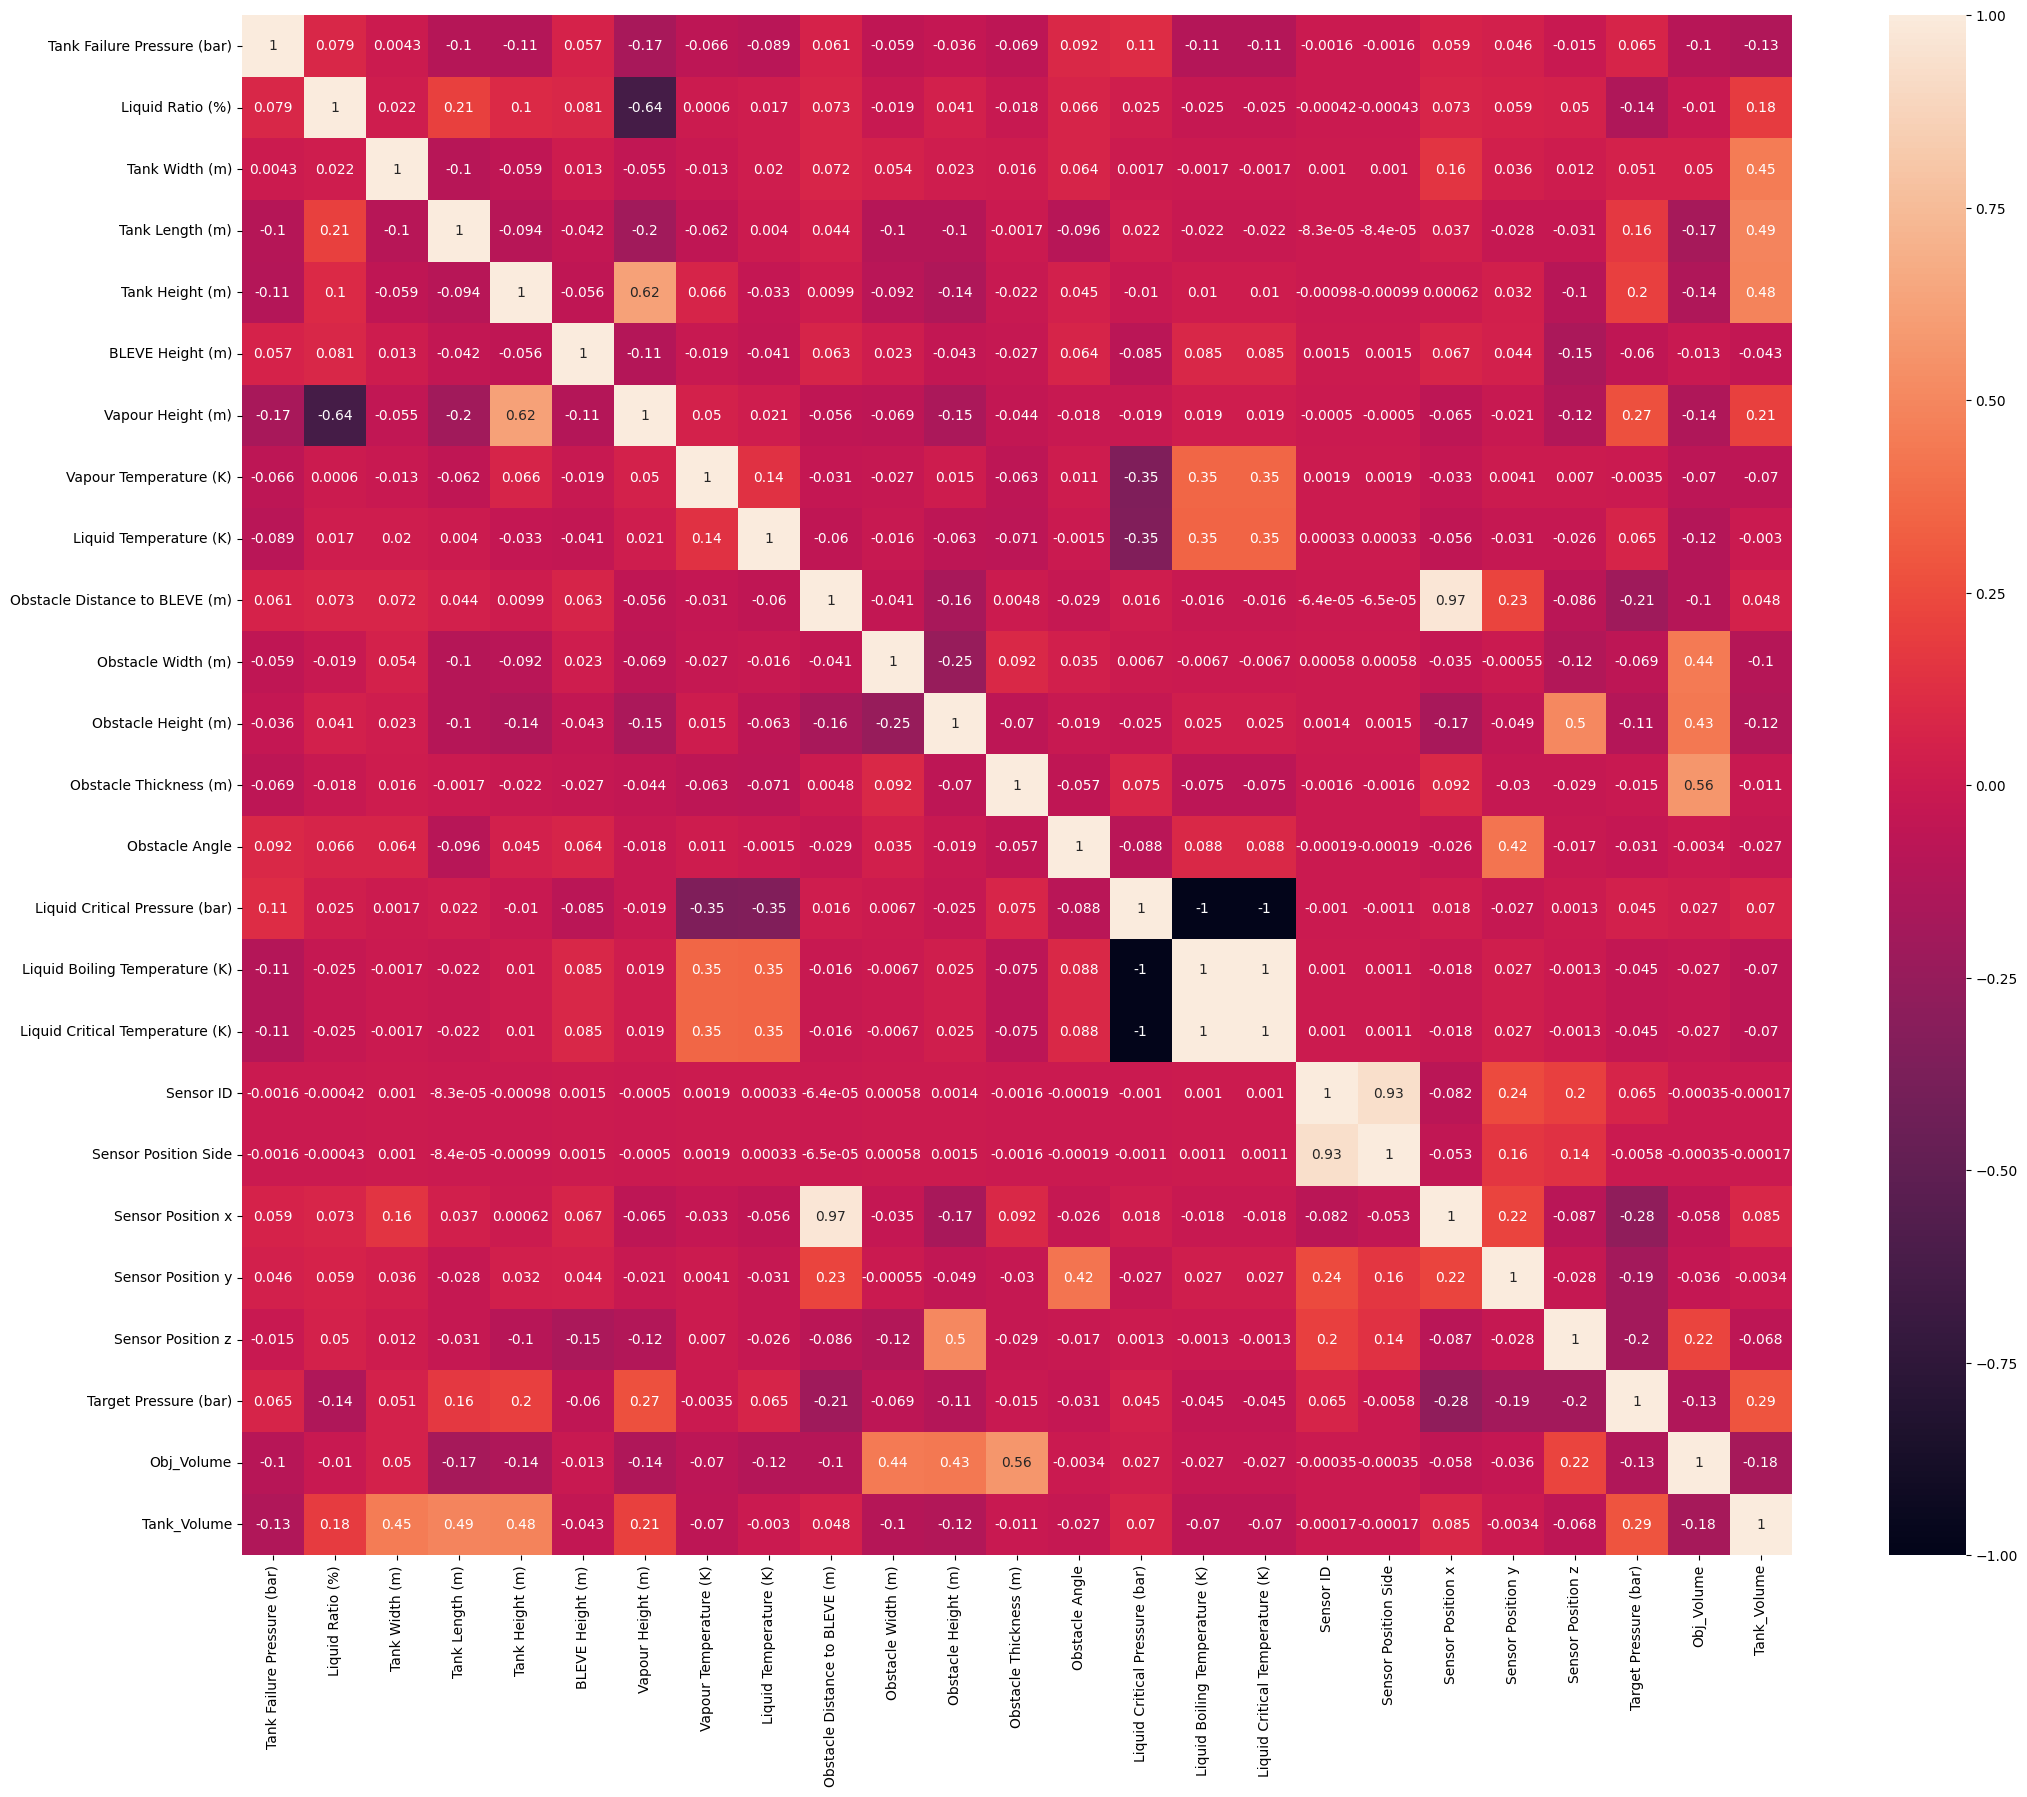

In [12]:
corr_df = pd.DataFrame(train_data.corr(numeric_only=True))
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(corr_df,annot=True,ax=ax)

## Noting coloumns with less coorelation with target
1. Tank Failure Pressure (bar)   0.06
2. Tank Width (m)  0.051
3. BLEVE Height (m)  0.06
4. Vapour Temperature (K)  0.0035
5. Liquid Temperature (K)  0.06
6. Obstacle Width (m)  0.069
7. Obstacle Thickness (m)  0.015
8. Obstacle Angle  0.03
9. Liquid Critical Pressure (bar)  0.045
10. Liquid Boiling Temperature (K)  0.045
11. Liquid Critical Temperature (K)  0.045
12. Sensor ID  0.065
13. Sensor Position Side  0.005


## Cols we will remove with reasons 
  
- Tank Width (m)  0.051  * Volume is taken thats why no need to keep this, length and height is directly under affects so we are considering them.
- Obstacle Thickness (m)  0.015  * Volume is taken thats why no need to keep this, length and width is directly under affects so we are considering them.
- Liquid Critical Pressure (bar)  0.045   * Correlation is 1 with other 2 col Liquid Boiling Temperature and Liquid Critical Temperature
- Sensor Position Side  0.005  * seems like most of the data is collected when bleave is happening in front therefore not much affecting the side of the obstacle
- Obstacle Distance to BLEVE (m) * high corelation with sensor x
- Liquid Ratio (%)  * high corelation with vapour height
- Liquid Critical Temperature (K)  *High Correlation

In [13]:
train_data.drop(columns=['Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side'],axis='y',inplace=True)

In [14]:
train_data.drop(columns=['Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)

In [15]:
train_data.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Status,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,Superheated,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,Superheated,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,Superheated,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,Superheated,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,Superheated,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96


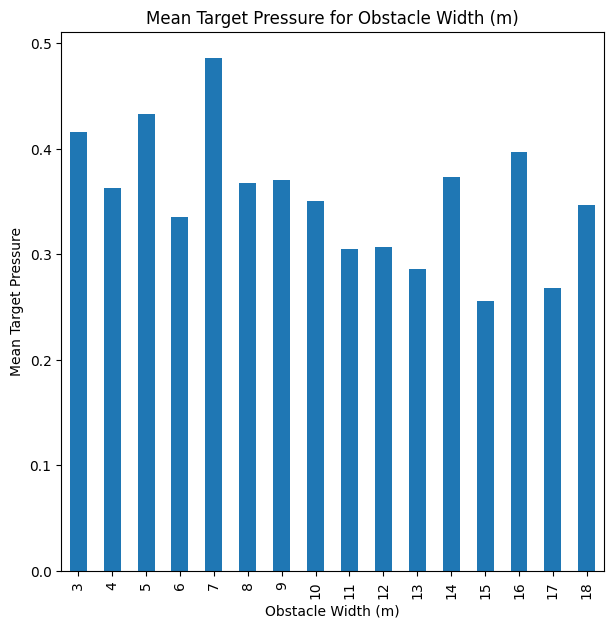

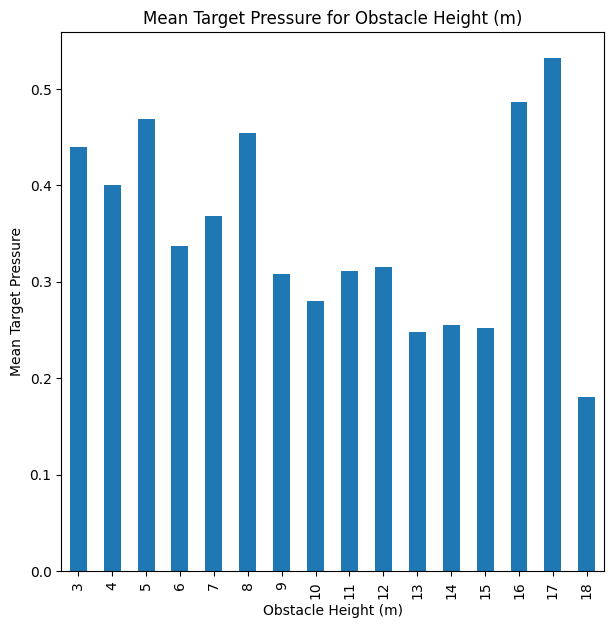

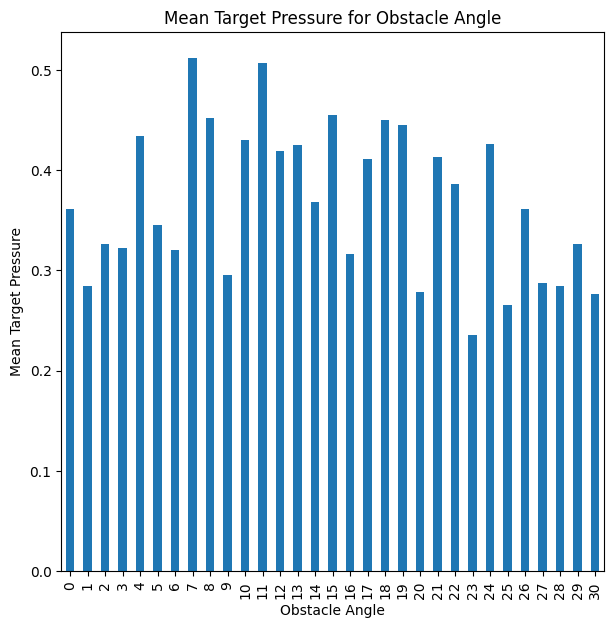

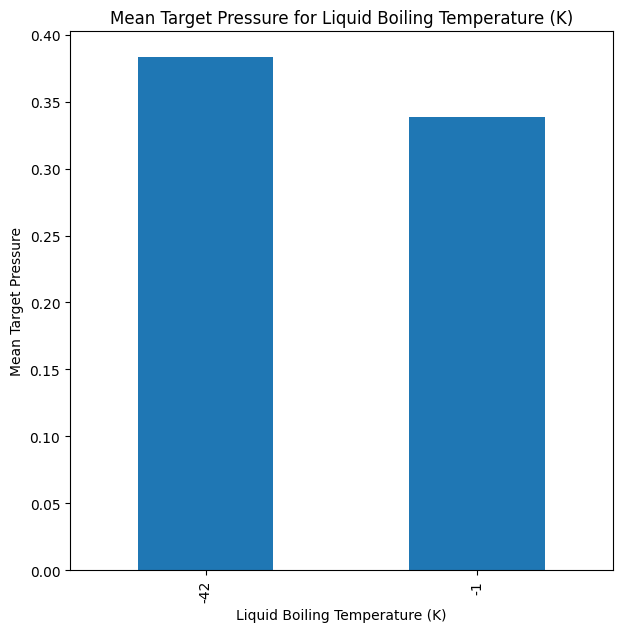

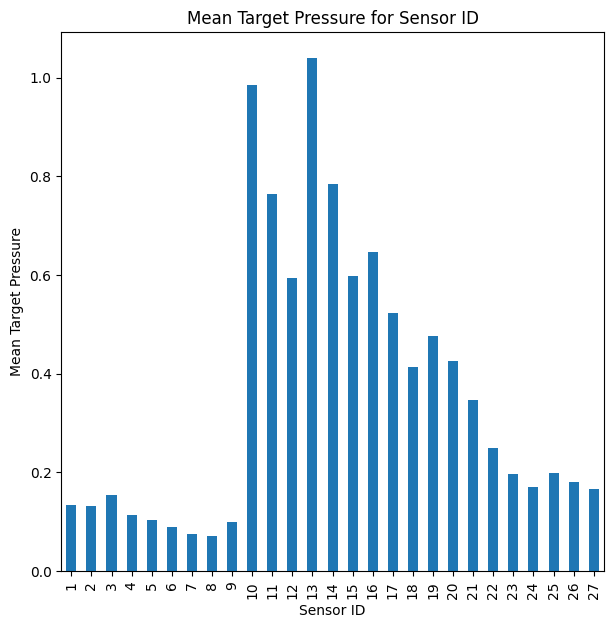

In [16]:
# Discrete Variables Analysis:

for col in train_data.columns:
    if train_data[col].dtypes == 'int64':
        fig ,ax  = plt.subplots(figsize = (7,7))
        grouped = train_data.groupby(col)['Target Pressure (bar)'].mean()

        grouped.plot(kind='bar',ax=ax)
        plt.xlabel(col)
        plt.ylabel('Mean Target Pressure')
        plt.title(f'Mean Target Pressure for {col}')
        plt.show()

#### Findings:
- The most closest obstacle placed felt most pressure and obstacle distance have a **_monotonic relation_** with the target feature

- The most pressure was felt by the object with 17m height and most least by 18m height.

- We can see here that the most pressure generated was by "SuperHeated" liquid type

- On average more pressure was generated by higher substance critical temperature

- We can see the most pressure from waves felt by the sensors were 10(bottom left of obstacle) and 14(middle of obstacle)

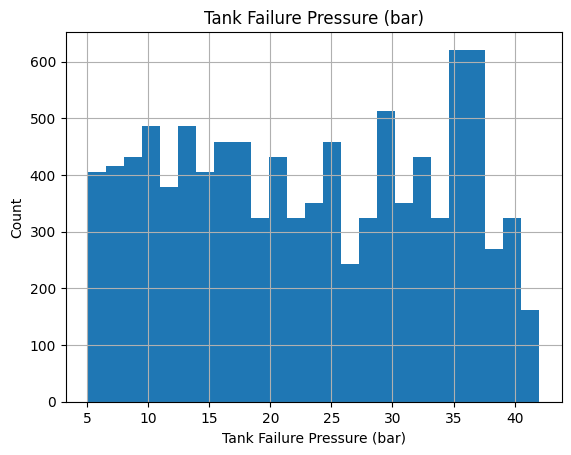

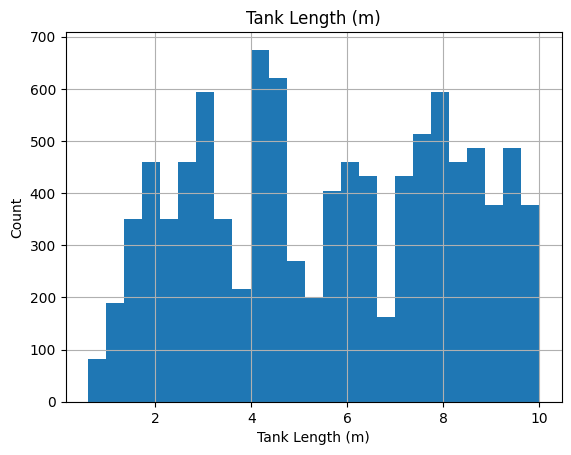

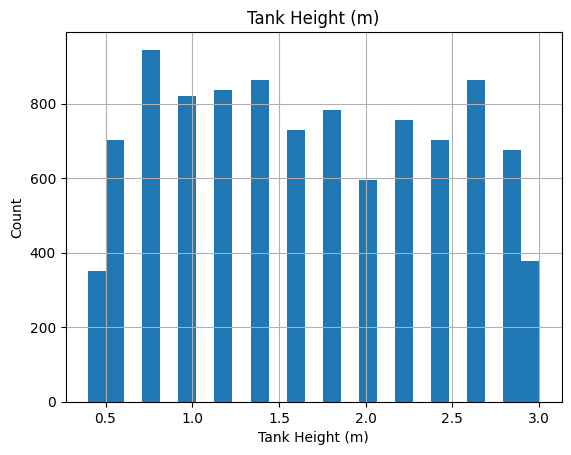

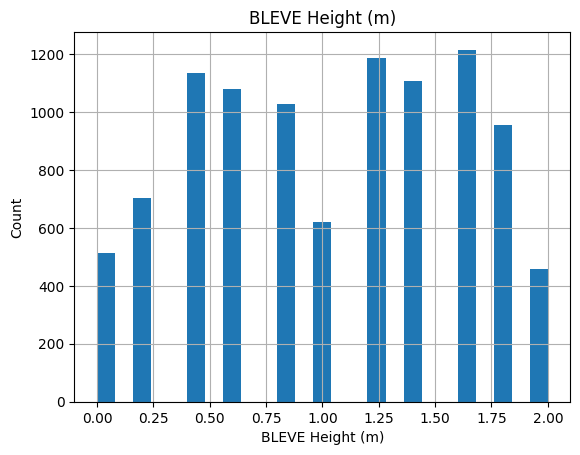

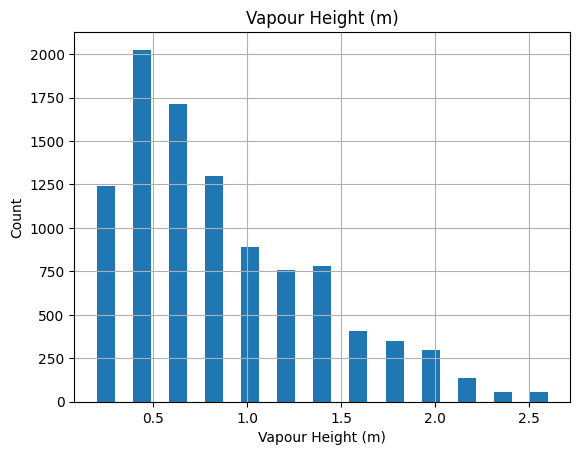

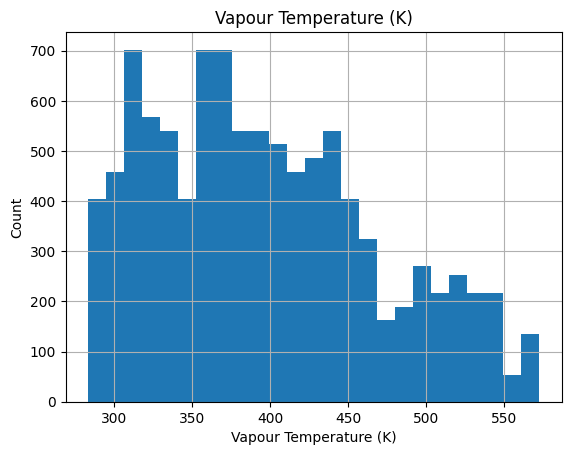

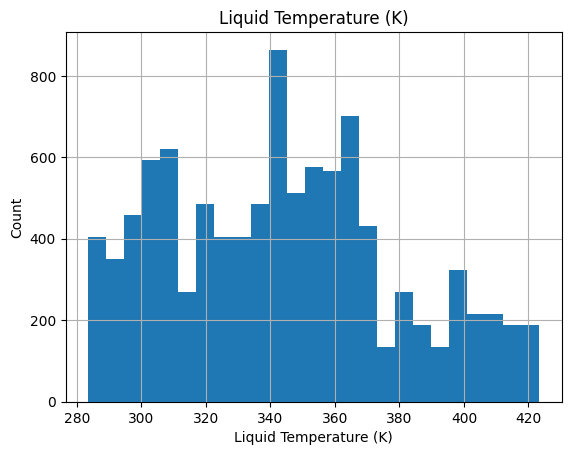

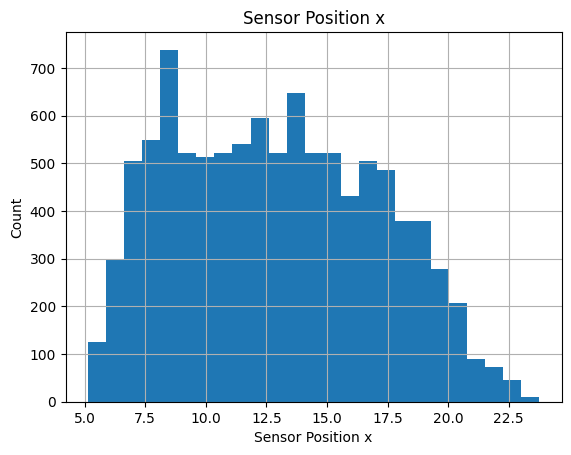

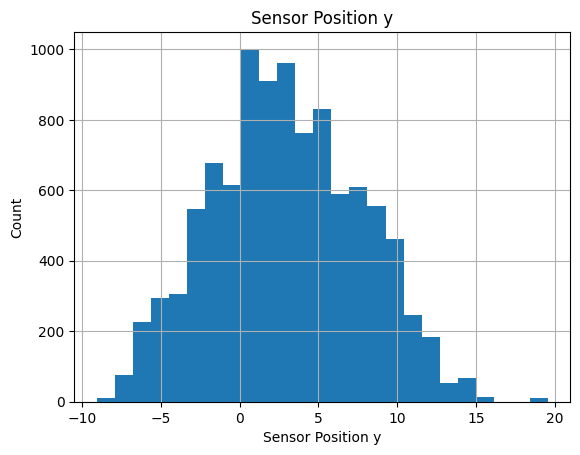

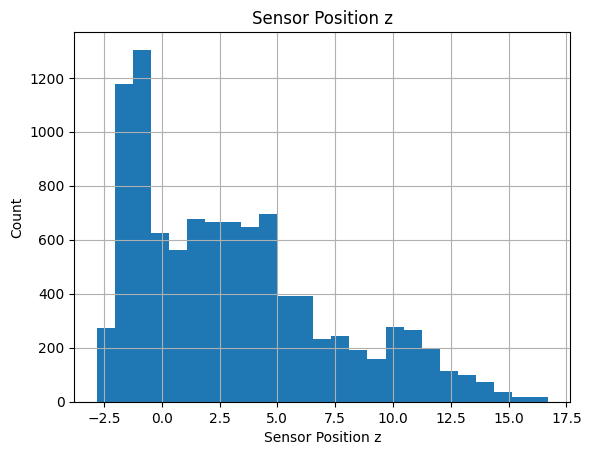

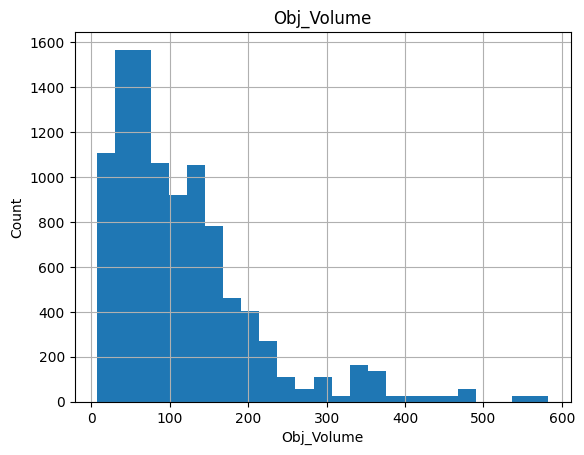

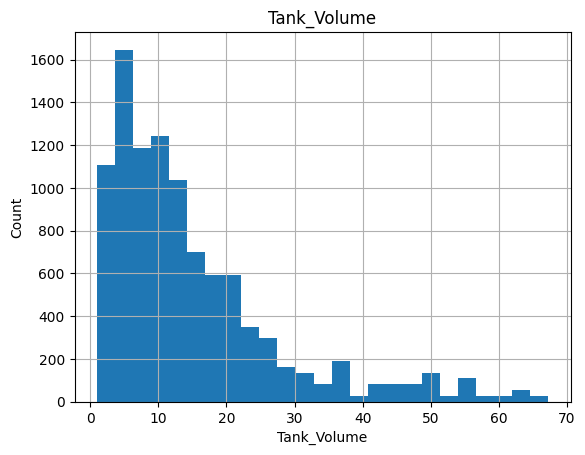

In [17]:
#Lets analyse the continuous values by creating histograms to understand the distribution

for col in train_data.columns:
    if train_data[col].dtypes == 'float64' and col!= 'Target Pressure (bar)':
        train_data[col].hist(bins=25)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(col)
        plt.show()

In [18]:
# Distributions arent normal

In [19]:
train_data["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [20]:
#  Superheated == 0 and Subcooled == 1
train_data['new_status'] = train_data["Status"].replace(["Superheated",'Subcooled'], [0,1])
train_data.drop(columns='Status',axis='y',inplace=True)

In [21]:
train_data.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96,0


In [22]:
df = train_data.copy()  #Coping data

In [23]:
df.duplicated().sum()  #Check Duplicates

0

In [24]:
#Checking the number of unique values of each column
df.nunique()

Tank Failure Pressure (bar)        226
Tank Length (m)                     48
Tank Height (m)                     14
BLEVE Height (m)                    11
Vapour Height (m)                   13
Vapour Temperature (K)             337
Liquid Temperature (K)             328
Obstacle Width (m)                  16
Obstacle Height (m)                 16
Obstacle Angle                      31
Liquid Boiling Temperature (K)       2
Sensor ID                           27
Sensor Position x                  306
Sensor Position y                  415
Sensor Position z                  180
Target Pressure (bar)             9997
Obj_Volume                         199
Tank_Volume                        309
new_status                           2
dtype: int64

In [25]:
#Check statistics of data set
df.describe()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000
mean,22.951900,5.597640,1.673380,1.024020,0.845700,396.744560,343.496490,8.910200,8.118400,14.598400,-20.593900,14.008500,12.907179,2.985135,3.080190,0.360069,115.69440,14.966251,0.63180
std,10.547951,2.597797,0.751486,0.575427,0.536015,71.814197,35.520142,3.935745,3.690575,9.240523,20.480989,7.790539,4.159773,4.712540,4.210632,0.494650,93.02286,12.756884,0.48234
min,5.100000,0.600000,0.400000,0.000000,0.200000,283.200000,283.500000,3.000000,3.000000,0.000000,-42.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098,7.20000,1.008000,0.00000
25%,13.700000,3.400000,1.000000,0.600000,0.400000,336.300000,312.700000,5.000000,5.000000,6.000000,-42.000000,7.000000,9.300000,-0.200000,-0.600000,0.102143,48.60000,5.888000,0.00000
50%,22.600000,5.600000,1.600000,1.000000,0.800000,386.500000,342.400000,9.000000,8.000000,15.000000,-1.000000,14.000000,12.700000,2.800000,2.300000,0.206182,88.20000,10.920000,1.00000
75%,32.100000,7.800000,2.400000,1.600000,1.200000,441.200000,365.400000,12.000000,11.000000,22.000000,-1.000000,21.000000,16.250000,6.400000,5.300000,0.411745,153.00000,18.816000,1.00000
max,42.000000,10.000000,3.000000,2.000000,2.600000,572.300000,423.300000,18.000000,18.000000,30.000000,-1.000000,27.000000,23.750000,19.550000,16.700000,9.170477,582.40000,67.200000,1.00000


### Insights
- There are some(500) rows with bleve height as zero 
- mean and std are very far from each other.

### Checking for Outliers

<Axes: >

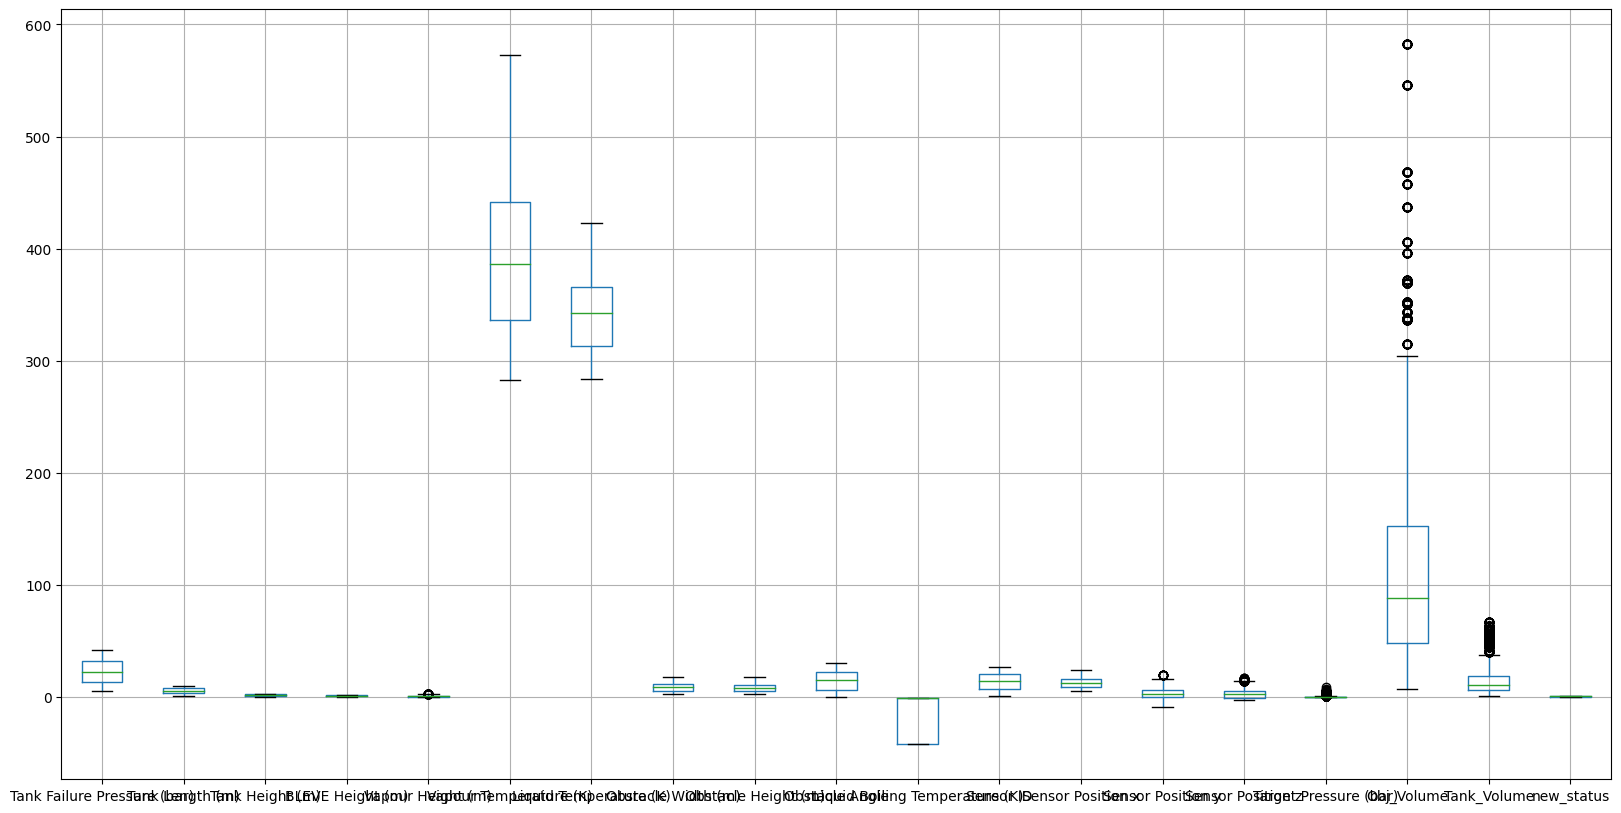

In [26]:
train_data.boxplot(figsize=(20,10))

<Axes: >

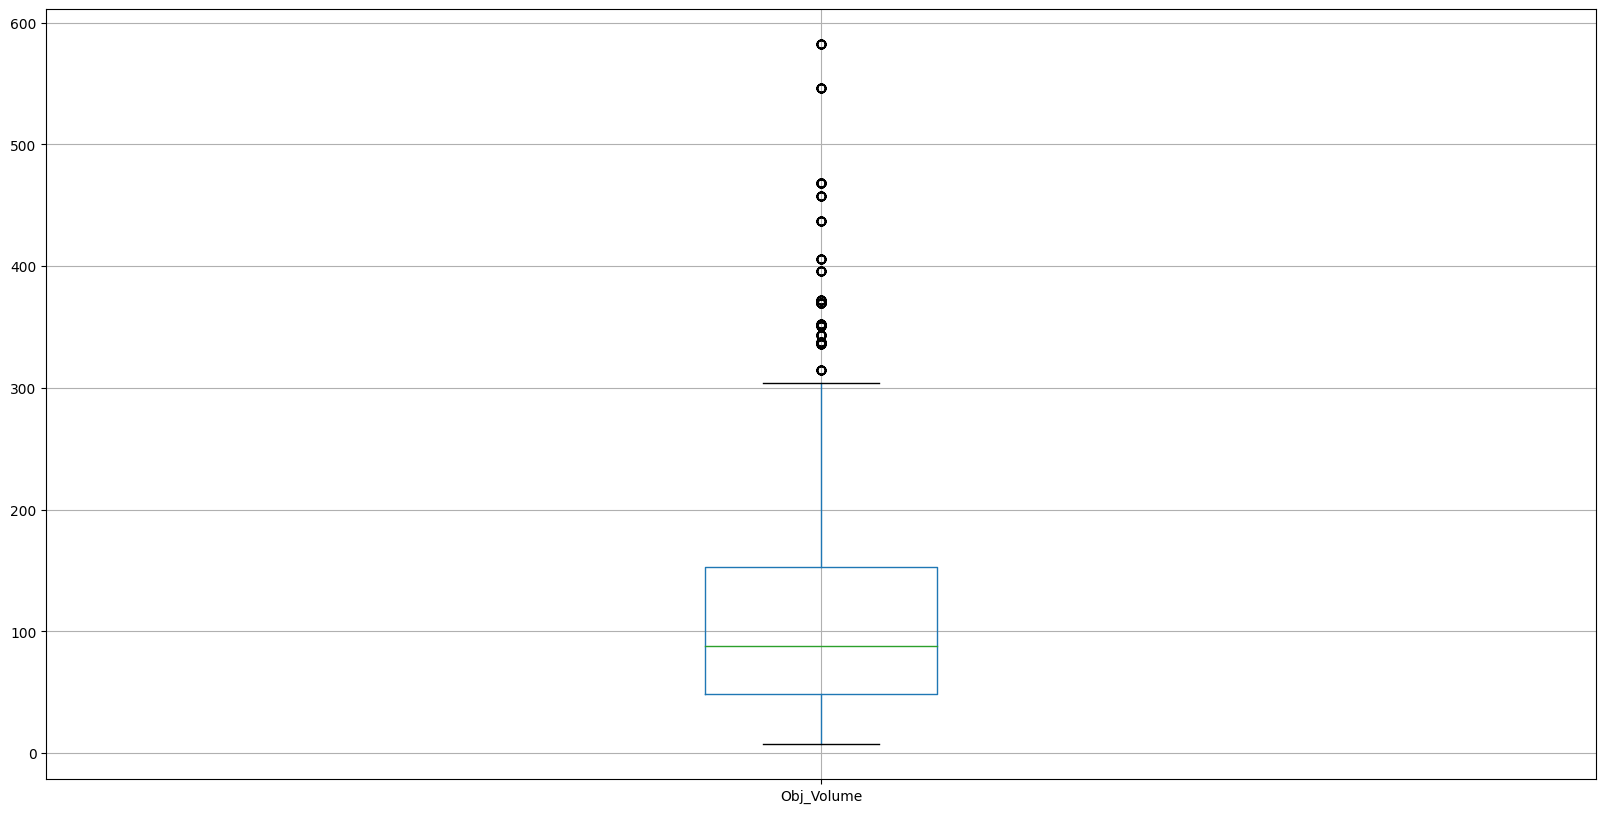

In [27]:
train_data[['Obj_Volume']].boxplot(figsize=(20,10))

<Axes: >

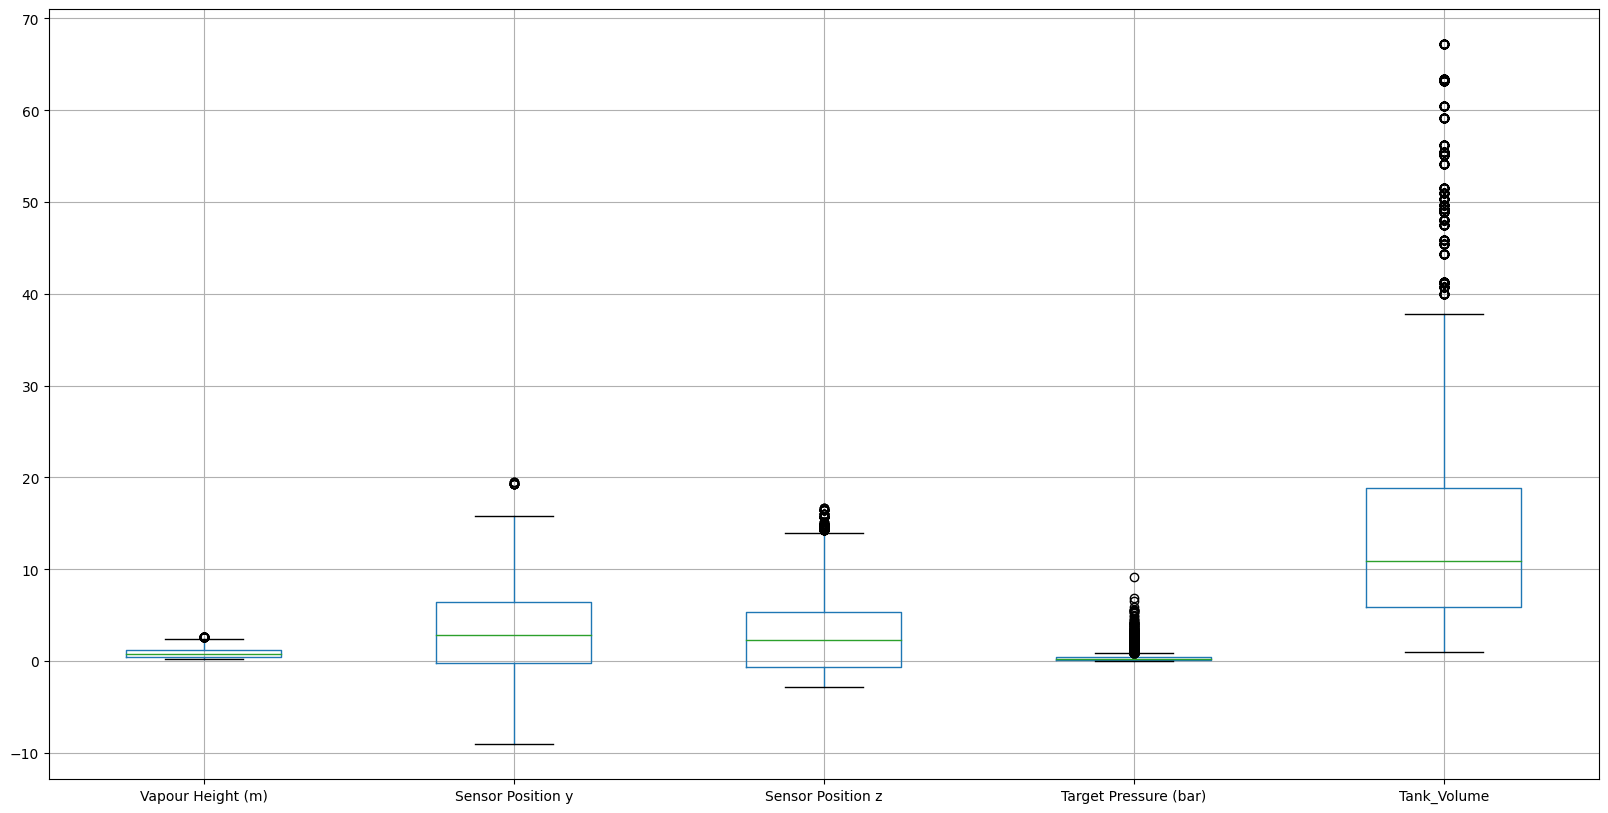

In [28]:
train_data[['Vapour Height (m)','Sensor Position y','Sensor Position z','Target Pressure (bar)','Tank_Volume']].boxplot(figsize=(20,10))

In [29]:
#Outlier using IQR test
def outliers_IQR_test(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in df:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers

outliers_list = outliers_IQR_test(df['Tank_Volume'])
len(outliers_list)

675

### Since there are many outliers we will go for tree based models, and tree based models dont need scaling

In [30]:
!pip install ydata-profiling

In [31]:
from ydata_profiling import ProfileReport

In [32]:
profile = ProfileReport(df, title="Profiling Report")

In [33]:
#profile

In [34]:
#profile.to_widgets()

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
# Creating xtrain,ytrain,xtest and ytest for model building and evaluating

In [37]:
X_train = df.drop(columns="Target Pressure (bar)")
y_train = df[["Target Pressure (bar)"]]

In [38]:
X_train.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,85.8,12.96,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,85.8,12.96,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,85.8,12.96,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,85.8,12.96,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,85.8,12.96,0


In [39]:
# preprocessing test data
X_test = pd.read_csv("test.csv")
X_test['Obj_Volume'] = X_test['Obstacle Width (m)'] * X_test['Obstacle Height (m)'] * X_test['Obstacle Thickness (m)']
X_test["Tank_Volume"] = X_test["Tank Length (m)"] * X_test['Tank Height (m)'] * X_test['Tank Width (m)']
X_test.drop(columns=['ID','Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side','Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)
X_test['new_status'] = X_test["Status"].replace(["Superheated",'Subcooled'], [0,1])
X_test.drop(columns='Status',axis='y',inplace=True)
X_test.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status
0,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,1,12.05,-5.6,-1.0,36.0,52.976,0
1,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,2,12.05,-5.6,1.3,36.0,52.976,0
2,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,3,12.05,-5.6,3.6,36.0,52.976,0
3,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,4,12.05,0.2,-1.0,36.0,52.976,0
4,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,5,12.05,0.2,1.3,36.0,52.976,0


In [40]:
y_train.head()

,Target Pressure (bar)
0,0.199929
1,0.435681
2,0.264031
3,0.270576
4,0.204675


In [41]:
y_test = pd.read_csv('sample_prediction.csv')
y_test.drop(columns='ID',axis='y',inplace=True)
y_test.head()

,Target Pressure (bar)
0,0.944502
1,0.506173
2,0.306880
3,0.027756
4,0.384144


In [42]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 581.0 kB/s eta 0:02:52
   ---------------------------------------- 0.1/99.8 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 831.5 kB/s eta 0:02:00
   ---------------------------------------- 0.2/99.8 MB 942.1 kB/s eta 0:01:46
   ---------------------------------------- 0.3/99.8 MB 999.0 kB/s eta 0:01:40
   ---------------------------------------- 0.4/99.8 MB 1.0 MB/s eta 0:01:36
   ---------------------------------------- 0.4/99.8 MB 1.0 MB/s eta 0:01:38
   ---------------------------------------- 0.6/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.7/99.8 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 1.1/99.8 MB 2.0 MB/s eta 

In [43]:
# Modelling libs
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [44]:
x_train = X_train
x_test = X_test
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [45]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.4079
- Mean Absolute Error: 0.2461
- R2 Score: 0.3199
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4437
- Mean Absolute Error: 0.3616
- R2 Score: -1.3693


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4788
- Mean Absolute Error: 0.2777
- R2 Score: 0.0630
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3300
- Mean Absolute Error: 0.2758
- R2 Score: -0.3108


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.4079
- Mean Absolute Error: 0.2461
- R2 Score: 0.3199
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4437
- Mean Absolute Error: 0.3616
- R2 Score: -1.3691


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1797
- Mean Absolute Error: 0.0782
- R2 Score: 0.8680
--------------------

## Getting -ve r2 score means train and test data variation is high, lets check

In [46]:
x_train.describe()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000
mean,22.951900,5.597640,1.673380,1.024020,0.845700,396.744560,343.496490,8.910200,8.118400,14.598400,-20.593900,14.008500,12.907179,2.985135,3.080190,115.69440,14.966251,0.63180
std,10.547951,2.597797,0.751486,0.575427,0.536015,71.814197,35.520142,3.935745,3.690575,9.240523,20.480989,7.790539,4.159773,4.712540,4.210632,93.02286,12.756884,0.48234
min,5.100000,0.600000,0.400000,0.000000,0.200000,283.200000,283.500000,3.000000,3.000000,0.000000,-42.000000,1.000000,5.150000,-9.050000,-2.800000,7.20000,1.008000,0.00000
25%,13.700000,3.400000,1.000000,0.600000,0.400000,336.300000,312.700000,5.000000,5.000000,6.000000,-42.000000,7.000000,9.300000,-0.200000,-0.600000,48.60000,5.888000,0.00000
50%,22.600000,5.600000,1.600000,1.000000,0.800000,386.500000,342.400000,9.000000,8.000000,15.000000,-1.000000,14.000000,12.700000,2.800000,2.300000,88.20000,10.920000,1.00000
75%,32.100000,7.800000,2.400000,1.600000,1.200000,441.200000,365.400000,12.000000,11.000000,22.000000,-1.000000,21.000000,16.250000,6.400000,5.300000,153.00000,18.816000,1.00000
max,42.000000,10.000000,3.000000,2.000000,2.600000,572.300000,423.300000,18.000000,18.000000,30.000000,-1.000000,27.000000,23.750000,19.550000,16.700000,582.40000,67.200000,1.00000


In [47]:
x_test.describe()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,21.311677,5.131939,1.569841,1.043022,0.832657,402.830815,342.685701,8.285670,8.743053,13.792382,-20.699969,13.973462,13.016001,2.900172,3.383672,121.219482,13.898990,0.590072
std,10.121292,2.551533,0.701975,0.574807,0.528933,73.493618,37.186078,3.786115,3.995529,9.021297,20.487582,7.786075,4.336545,4.496398,4.474618,96.637692,12.544651,0.491897
min,5.100000,0.600000,0.400000,0.000000,0.200000,292.600000,283.100000,3.000000,3.000000,0.000000,-42.000000,1.000000,5.150000,-6.850000,-2.900000,7.200000,1.344000,0.000000
25%,13.200000,3.200000,1.000000,0.600000,0.400000,341.600000,313.100000,5.000000,5.000000,6.000000,-42.000000,7.000000,9.350000,0.150000,-0.600000,43.200000,5.016000,0.000000
50%,20.600000,4.600000,1.400000,1.000000,0.600000,391.900000,340.500000,8.000000,9.000000,13.000000,-1.000000,14.000000,12.600000,2.850000,2.500000,96.000000,8.960000,1.000000
75%,30.700000,7.400000,2.200000,1.600000,1.200000,438.800000,368.800000,11.000000,12.000000,22.000000,-1.000000,21.000000,16.375000,6.100000,6.100000,168.000000,18.648000,1.000000
max,42.000000,9.800000,3.000000,2.000000,2.400000,571.800000,424.400000,18.000000,18.000000,30.000000,-1.000000,27.000000,22.950000,17.250000,16.500000,507.000000,65.856000,1.000000


### From this we can see that mean and std of both x_train and x_test are close only, Checking target stats now

In [48]:
y_train.describe()

,Target Pressure (bar)
count,10000.000000
mean,0.360069
std,0.494650
min,0.016098
25%,0.102143
50%,0.206182
75%,0.411745
max,9.170477


In [49]:
y_test.describe()

,Target Pressure (bar)
count,3203.000000
mean,0.496214
std,0.288282
min,0.000262
25%,0.243449
50%,0.503234
75%,0.744267
max,0.997078


### Insights
- there is huge difference between std and mean. which means for the same values we are getting different output from train/test data.
- the max value of train data is 9 where as its only 0.9 in test which means there is mismatch in data

In [50]:
# Removing target values more than 1 form train data

In [51]:
df[df['Target Pressure (bar)']>1]

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
100,36.5,3.0,1.4,1.4,0.6,411.9,313.2,6,7,2,-42,10,6.15,-2.60,-1.5,1.721662,92.4,10.08,1
103,36.5,3.0,1.4,1.4,0.6,411.9,313.2,6,7,2,-42,13,6.15,0.20,-1.5,2.153990,92.4,10.08,1
106,36.5,3.0,1.4,1.4,0.6,411.9,313.2,6,7,2,-42,16,6.15,3.00,-1.5,1.576489,92.4,10.08,1
235,21.0,9.0,1.4,0.4,0.8,333.8,344.9,4,8,8,-42,10,13.55,0.00,-0.6,1.132930,32.0,15.12,0
236,21.0,9.0,1.4,0.4,0.8,333.8,344.9,4,8,8,-42,11,13.55,0.00,3.2,1.095016,32.0,15.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9880,5.8,6.8,2.2,1.2,1.4,431.6,348.5,4,17,3,-42,16,6.95,2.20,-1.7,1.845711,68.0,29.92,0
9883,5.8,6.8,2.2,1.2,1.4,431.6,348.5,4,17,3,-42,19,7.50,-1.65,-1.7,1.141078,68.0,29.92,0
9955,36.8,7.6,1.4,1.4,0.6,565.5,371.8,3,14,25,-1,10,8.45,2.50,-1.5,1.376296,16.8,10.64,1
9958,36.8,7.6,1.4,1.4,0.6,565.5,371.8,3,14,25,-1,13,8.45,3.80,-1.5,1.324673,16.8,10.64,1


In [52]:
# So there is 696 missprints since we have 10k data we will remove these

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tank Failure Pressure (bar)     10000 non-null  float64
 1   Tank Length (m)                 10000 non-null  float64
 2   Tank Height (m)                 10000 non-null  float64
 3   BLEVE Height (m)                10000 non-null  float64
 4   Vapour Height (m)               10000 non-null  float64
 5   Vapour Temperature (K)          10000 non-null  float64
 6   Liquid Temperature (K)          10000 non-null  float64
 7   Obstacle Width (m)              10000 non-null  int64  
 8   Obstacle Height (m)             10000 non-null  int64  
 9   Obstacle Angle                  10000 non-null  int64  
 10  Liquid Boiling Temperature (K)  10000 non-null  int64  
 11  Sensor ID                       10000 non-null  int64  
 12  Sensor Position x               1

In [54]:
df= df[df['Target Pressure (bar)']<1]

In [55]:
df.describe()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
count,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000,9304.000000
mean,22.778730,5.499248,1.638005,1.030997,0.812532,397.090692,343.009706,8.962167,8.210877,14.629837,-20.371883,14.030417,13.144894,3.131787,3.258856,0.256946,118.052730,14.140001,0.634351
std,10.558095,2.592452,0.747210,0.574818,0.519835,71.670797,35.359251,3.948784,3.700177,9.283542,20.470036,8.036775,4.127264,4.775530,4.255157,0.212367,94.635565,11.976386,0.481638
min,5.100000,0.600000,0.400000,0.000000,0.200000,283.200000,283.500000,3.000000,3.000000,0.000000,-42.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098,7.200000,1.008000,0.000000
25%,13.400000,3.200000,1.000000,0.600000,0.400000,336.900000,312.700000,6.000000,5.000000,6.000000,-42.000000,7.000000,9.600000,0.000000,-0.500000,0.097138,49.950000,5.760000,0.000000
50%,22.400000,5.600000,1.600000,1.000000,0.600000,386.500000,342.000000,9.000000,8.000000,15.000000,-1.000000,14.000000,13.050000,3.000000,2.500000,0.185411,92.400000,10.560000,1.000000
75%,31.900000,7.800000,2.200000,1.600000,1.200000,442.200000,365.100000,12.000000,11.000000,22.000000,-1.000000,21.000000,16.500000,6.600000,5.600000,0.354937,154.000000,18.000000,1.000000
max,42.000000,10.000000,3.000000,2.000000,2.600000,572.300000,423.300000,18.000000,18.000000,30.000000,-1.000000,27.000000,23.750000,19.550000,16.700000,0.999393,582.400000,67.200000,1.000000


In [56]:
# Remaking X_train, X_test and retraining model

In [57]:
X_train = df.drop(columns="Target Pressure (bar)")
y_train = df[["Target Pressure (bar)"]]

In [58]:
x_train = X_train
x_test = X_test
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1766
- Mean Absolute Error: 0.1357
- R2 Score: 0.3083
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3970
- Mean Absolute Error: 0.3251
- R2 Score: -0.8971


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.2104
- Mean Absolute Error: 0.1645
- R2 Score: 0.0181
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3753
- Mean Absolute Error: 0.3084
- R2 Score: -0.6956


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1766
- Mean Absolute Error: 0.1357
- R2 Score: 0.3083
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3970
- Mean Absolute Error: 0.3251
- R2 Score: -0.8971




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0827
- Mean Absolute Error: 0.0524
- R2 Score: 0.8482
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4062
- Mean Absolute Error: 0.3316
- R2 Score: -0.9856


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4394
- Mean Absolute Error: 0.3602
- R2 Score: -1.3235


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0204
- Mean Absolute Error: 0.0124
- R2 Score: 0.9908
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4227
- Mean Absolute Error: 0.3463
- R2 Score: -1.1508


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0240
- Mean Absolute Error: 0.0166
- R2 Score: 0.9872

### Still getting -ve r2 score because of huge difference in test and train
#### Going to mix the data for better results and we might need to do data augmentation

# A fresh new start

In [60]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
test_data['Target Pressure (bar)'] = y_test['Target Pressure (bar)']
test_data

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,1,1,12.05,-5.6,-1.0,0.944502
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,2,1,12.05,-5.6,1.3,0.506173
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,3,1,12.05,-5.6,3.6,0.306880
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,4,1,12.05,0.2,-1.0,0.027756
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,10,12,5,0.6,1,Superheated,37.9,-1,152.0,5,1,12.05,0.2,1.3,0.384144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,3198,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,13,2,12.15,2.6,-1.9,0.139631
3199,3199,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,14,2,12.15,2.6,4.4,0.378838
3200,3200,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,15,2,12.15,2.6,10.7,0.817355
3201,3201,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,16,2,12.15,7.9,-1.9,0.160787


In [61]:
train_data

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929
1,3204,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681
2,3205,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031
3,3206,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576
4,3207,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13198,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,23,4,16.10,0.80,14.7,0.100168
9996,13199,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,24,4,16.10,6.60,14.7,0.116293
9997,13200,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,25,5,16.10,6.85,-0.2,0.112795
9998,13201,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,26,5,16.10,6.85,7.1,0.126599


In [62]:
df = pd.concat([train_data, test_data])
df

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929
1,3204,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681
2,3205,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031
3,3206,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576
4,3207,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,3198,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,13,2,12.15,2.60,-1.9,0.139631
3199,3199,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,14,2,12.15,2.60,4.4,0.378838
3200,3200,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,15,2,12.15,2.60,10.7,0.817355
3201,3201,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,16,2,12.15,7.90,-1.9,0.160787


In [63]:
df= df[df['Target Pressure (bar)']<1]
df

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929
1,3204,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681
2,3205,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031
3,3206,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576
4,3207,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,3198,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,13,2,12.15,2.60,-1.9,0.139631
3199,3199,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,14,2,12.15,2.60,4.4,0.378838
3200,3200,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,15,2,12.15,2.60,10.7,0.817355
3201,3201,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,16,2,12.15,7.90,-1.9,0.160787


In [64]:
#new df created, doing the same preprocessing operations we did above

In [65]:
df['Obj_Volume'] = df['Obstacle Width (m)'] * df['Obstacle Height (m)'] * df['Obstacle Thickness (m)']
df["Tank_Volume"] = df["Tank Length (m)"] * df['Tank Height (m)'] * df['Tank Width (m)']
df.drop(columns=['ID','Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side','Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)
df['new_status'] = df["Status"].replace(["Superheated",'Subcooled'], [0,1])
df.drop(columns='Status',axis='y',inplace=True)
df.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96,0


In [66]:
x = df.drop(columns="Target Pressure (bar)")
y = df[["Target Pressure (bar)"]]

In [67]:
df

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,13,12.15,2.60,-1.9,0.139631,85.8,12.96,0
3199,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,14,12.15,2.60,4.4,0.378838,85.8,12.96,0
3200,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,15,12.15,2.60,10.7,0.817355,85.8,12.96,0
3201,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,16,12.15,7.90,-1.9,0.160787,85.8,12.96,0


In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2424
- Mean Absolute Error: 0.1953
- R2 Score: 0.1116
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2360
- Mean Absolute Error: 0.1903
- R2 Score: 0.1306


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.2564
- Mean Absolute Error: 0.2113
- R2 Score: 0.0061
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2525
- Mean Absolute Error: 0.2080
- R2 Score: 0.0051


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2424
- Mean Absolute Error: 0.1953
- R2 Score: 0.1116
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2360
- Mean Absolute Error: 0.1903
- R2 Score: 0.1306




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1564
- Mean Absolute Error: 0.1046
- R2 Score: 0.6302
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1970
- Mean Absolute Error: 0.1374
- R2 Score: 0.3941


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2364
- Mean Absolute Error: 0.1348
- R2 Score: 0.1280


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0649
- Mean Absolute Error: 0.0386
- R2 Score: 0.9363
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1732
- Mean Absolute Error: 0.1040
- R2 Score: 0.5318


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1012
- Mean Absolute Error: 0.0642
- R2 Score: 0.8453
--

#### Since we are getting best scores and least overfitting in random forest we'll move forward with it

In [69]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250,300,400,500],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20,30,50],
                 'min_samples_split' : [2, 5, 10, 15,25,50, 100],
                 'min_samples_leaf' : [1, 2, 5, 10,20,50]
                }
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=4,n_jobs=-1,verbose=2,random_state=45,n_iter=50)
rf_model.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 15, 25,
                                                              50, 100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250, 300,
                                                         400, 500]},
                   random_state=45, verbose=2)

In [70]:
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50}

In [71]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.537779349010054

In [72]:
rf_final=RandomForestRegressor(n_estimators= 180,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth=30)
rf_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=180)

In [73]:
#predicting the values
pred=rf_final.predict(x_test)
r2_score(y_test,pred)

0.5398877314992397

In [74]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.820731265294546

In [75]:
'''
from sklearn.model_selection import GridSearchCV
grid_search = {'n_estimators' : [120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20,25],
                 'min_samples_split' : [2, 5, 10, 15,50,100],
                 'min_samples_leaf' : [1, 2, 5, 10]
                 
                }
rf_regressor=RandomForestRegressor()
rf_model=GridSearchCV(estimator=rf_regressor,param_grid=grid_search,
                            cv=8,n_jobs=-1,verbose=2)
rf_model.fit(x_train,y_train)'''

"\nfrom sklearn.model_selection import GridSearchCV\ngrid_search = {'n_estimators' : [120, 150, 180, 200,220,250],\n                 'max_features':['auto','sqrt'],\n                 'max_depth':[5,10,15,20,25],\n                 'min_samples_split' : [2, 5, 10, 15,50,100],\n                 'min_samples_leaf' : [1, 2, 5, 10]\n                 \n                }\nrf_regressor=RandomForestRegressor()\nrf_model=GridSearchCV(estimator=rf_regressor,param_grid=grid_search,\n                            cv=8,n_jobs=-1,verbose=2)\nrf_model.fit(x_train,y_train)"

In [76]:
# preprocessing test data
X_test1 = pd.read_csv("test.csv")
X_test1['Obj_Volume'] = X_test1['Obstacle Width (m)'] * X_test1['Obstacle Height (m)'] * X_test1['Obstacle Thickness (m)']
X_test1["Tank_Volume"] = X_test1["Tank Length (m)"] * X_test1['Tank Height (m)'] * X_test1['Tank Width (m)']
X_test1.drop(columns=['ID','Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side','Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)
X_test1['new_status'] = X_test1["Status"].replace(["Superheated",'Subcooled'], [0,1])
X_test1.drop(columns='Status',axis='y',inplace=True)
X_test1

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status
0,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,1,12.05,-5.6,-1.0,36.0,52.976,0
1,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,2,12.05,-5.6,1.3,36.0,52.976,0
2,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,3,12.05,-5.6,3.6,36.0,52.976,0
3,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,4,12.05,0.2,-1.0,36.0,52.976,0
4,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,5,12.05,0.2,1.3,36.0,52.976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,13,12.15,2.6,-1.9,85.8,12.960,0
3199,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,14,12.15,2.6,4.4,85.8,12.960,0
3200,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,15,12.15,2.6,10.7,85.8,12.960,0
3201,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,16,12.15,7.9,-1.9,85.8,12.960,0


In [77]:
y_test1 = pd.read_csv('sample_prediction.csv')
y_test1.drop(columns='ID',axis='y',inplace=True)
y_test1

,Target Pressure (bar)
0,0.944502
1,0.506173
2,0.306880
3,0.027756
4,0.384144
...,...
3198,0.139631
3199,0.378838
3200,0.817355
3201,0.160787


In [78]:
#predicting the values
pred=rf_final.predict(X_test1)
r2_score(y_test1,pred)

0.380468979885623

In [79]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test1, pred)

2.7109310605320966

## We still are not getting satisfactory results. Applying root cause analysis.

 - Not getting good accuracy.... WHY?
    - Feature realtion we found by our ML model is not applicable for test data set... WHY?
       - Test data set have different relations with its independant features than train dataset..... WHY?
            - Test data may be collected via different source or have big time difference.
            
### Possible solutions
1. Collect more test data which is related to train dataset.
2. Scrap train dataset and make new model solely based on test dataset but than train dataset accuracy will fall.
3. Make cluster of test data and train data and make different models for them. Or make tree based model.
4. Consider train and test data as two different classes and Perform oversampling on test data. (Data augmentation)

### Problems with the possible solutions.
1. Collecting more data is not in my hand and may not be possible.
2. Train dataset Accuracy will fall.
3. Since mean and std deviation of independant features of train and test data are close, clusters might not be accurate and will not be able to segregate predictions accurately. It is a hit and trial method.
4. Oversampling decreases the overall accuracy even more but will decrease overfitting.

#### Since first two solutions are not feasible moving forward with 3rd and 4th one.

### Doing clustering on the df

In [81]:
!pip install kneed

The optimum number of clusters is: 4
kn.knee: 4


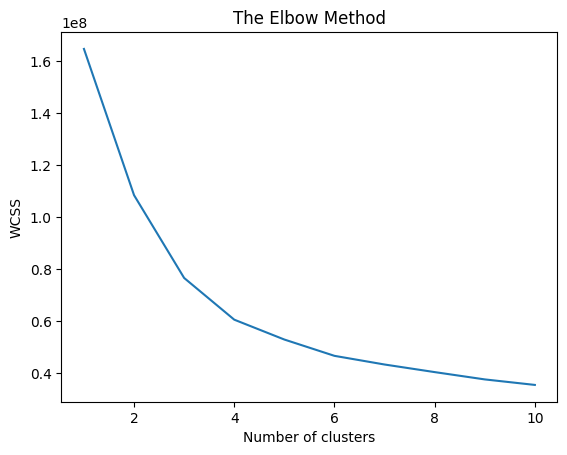

In [82]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
wcss=[]
try:
    for i in range (1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
        kmeans.fit(x_train) # fitting the data to the KMeans Algorithm
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    #plt.show()
    #plt.savefig('H:/boiling_liquid_expanding_vapour_explosion/K-Means_Elbow.PNG') # saving the elbow plot locally
    # finding the value of the optimum cluster programmatically
    kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
    print('The optimum number of clusters is: '+str(kn.knee))
    print("kn.knee:",kn.knee)
    number_of_clusters = kn.knee
except Exception as e:
    print('Exception occured in elbow_plot. Exception message:  ' + str(e))
    print('Finding the number of clusters failed.')
    raise Exception()

In [83]:
#Dividing the data into clusters
import pickle
try:
    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
    #self.data = self.data[~self.data.isin([np.nan, np.inf, -np.inf]).any(1)]
    y_kmeans=kmeans.fit_predict(x_train) #  divide data into clusters

    with open("KMeans.sav",'wb') as f:
        pickle.dump(kmeans, f)
        
    x_train['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information
    print('succesfully created '+str(kn.knee))
except Exception as e:
    print('Exception occured in creating clusters. Exception message:  ' + str(e))
    print('Fitting the data to clusters failed.')
    raise Exception()

succesfully created 4


In [84]:
x_copy = x_train.copy()
#create a new column in the dataset consisting of the corresponding cluster assignments.
x_copy["Labels"] = y_train["Target Pressure (bar)"]
train_final = x_copy.copy() # Copying for not loosing our cluster assignments if any further experiments performed as unexpected
train_final.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status,Cluster,Labels
75,27.0,4.6,2.4,1.6,0.4,306.5,294.6,10,13,4,-42,12,8.55,-4.20,11.0,338.0,13.248,1,0,0.259694
279,32.8,4.0,1.2,0.4,0.6,327.8,295.8,11,8,26,-42,10,14.75,1.50,-0.5,264.0,7.680,1,0,0.373121
4059,37.9,6.6,0.4,0.8,0.2,317.6,337.5,9,12,0,-42,27,7.70,4.55,10.9,64.8,2.112,1,3,0.113805
9006,20.3,4.4,1.8,1.4,0.4,373.2,300.5,9,5,1,-42,6,15.85,0.20,3.2,63.0,6.336,1,3,0.040354
8855,22.1,5.6,2.0,0.8,0.4,550.0,346.3,8,12,15,-1,17,11.65,6.80,5.0,153.6,15.680,1,2,0.343142


In [85]:
# getting the unique clusters from our dataset
list_of_clusters=train_final['Cluster'].unique()
list_of_clusters

array([0, 3, 2, 1])

In [86]:
# Looking For Best Model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

class Model_Finder:
    """
                This class shall be used to find the model with best accuracy and AUC score.
                Version: 1.0
                Revisions: None

                """

    def __init__(self):
        self.linearReg = LinearRegression()
        self.RandomForestReg = RandomForestRegressor()


    def get_best_params_for_Random_Forest_Regressor(self, train_x, train_y):
        """
                                                Method Name: get_best_params_for_Random_Forest_Regressor
                                                Description: get the parameters for Random_Forest_Regressor Algorithm which give the best accuracy.
                                                             Use Hyper Parameter Tuning.
                                                Output: The model with the best parameters
                                                On Failure: Raise Exception

                                                Version: 1.0
                                                Revisions: None

                                        """
        print('Entered the RandomForestReg method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            self.param_grid_Random_forest_Tree = {
                                "n_estimators": [10,20,30],
                                "max_features": ["auto", "sqrt", "log2"],
                                "min_samples_split": [2,4,8],
                                "bootstrap": [True, False]
                                                     }

            # Creating an object of the Grid Search class
            self.grid = GridSearchCV(self.RandomForestReg, self.param_grid_Random_forest_Tree, verbose=3, cv=5)
            # finding the best parameters
            self.grid.fit(train_x, train_y)

            # extracting the best parameters
            self.n_estimators = self.grid.best_params_['n_estimators']
            self.max_features = self.grid.best_params_['max_features']
            self.min_samples_split = self.grid.best_params_['min_samples_split']
            self.bootstrap = self.grid.best_params_['bootstrap']

            # creating a new model with the best parameters
            self.decisionTreeReg = RandomForestRegressor(n_estimators=self.n_estimators, max_features=self.max_features,
                                                         min_samples_split=self.min_samples_split, bootstrap=self.bootstrap)
            # training the mew models
            self.decisionTreeReg.fit(train_x, train_y)
            print( 'RandomForestReg best params: ' + str(self.grid.best_params_) + '. Exited the RandomForestReg method of the Model_Finder class')
            return self.decisionTreeReg
        except Exception as e:
            print('Exception occured in RandomForestReg method of the Model_Finder class. Exception message:  ' + str(e))
            print('RandomForestReg Parameter tuning  failed. Exited the knn method of the Model_Finder class')
            raise Exception()

    def get_best_params_for_linearReg(self,train_x,train_y):

        """
                                        Method Name: get_best_params_for_linearReg
                                        Description: get the parameters for LinearReg Algorithm which give the best accuracy.
                                                     Use Hyper Parameter Tuning.
                                        Output: The model with the best parameters
                                        On Failure: Raise Exception

                                        Version: 1.0
                                        Revisions: None

                                """
        print('Entered the get_best_params_for_linearReg method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            self.param_grid_linearReg = {
                'fit_intercept': [True, False],'copy_X': [True, False]

            }
            # Creating an object of the Grid Search class
            self.grid= GridSearchCV(self.linearReg,self.param_grid_linearReg, verbose=3,cv=5)
            # finding the best parameters
            self.grid.fit(train_x, train_y)

            # extracting the best parameters
            self.fit_intercept = self.grid.best_params_['fit_intercept']
            self.copy_X = self.grid.best_params_['copy_X']

            # creating a new model with the best parameters
            self.linReg = LinearRegression(fit_intercept=self.fit_intercept,copy_X=self.copy_X)
            # training the mew model
            self.linReg.fit(train_x, train_y)
            print('LinearRegression best params: ' + str(self.grid.best_params_) + '. Exited the get_best_params_for_linearReg method of the Model_Finder class')
            return self.linReg
        except Exception as e:
            print('Exception occured in get_best_params_for_linearReg method of the Model_Finder class. Exception message:  ' + str(e))
            print('LinearReg Parameter tuning  failed. Exited the get_best_params_for_linearReg method of the Model_Finder class')
            raise Exception()


    def get_best_model(self,train_x,train_y,test_x,test_y):
        """
                                                Method Name: get_best_model
                                                Description: Find out the Model which has the best AUC score.
                                                Output: The best model name and the model object
                                                On Failure: Raise Exception

                                                Version: 1.0
                                                Revisions: None

                                        """
        print('Entered the get_best_model method of the Model_Finder class')
        # create best model for Linear Regression
        try:

            self.LinearReg= self.get_best_params_for_linearReg(train_x, train_y)
            self.prediction_LinearReg = self.LinearReg.predict(test_x) # Predictions using the LinearReg Model
            self.LinearReg_error = r2_score(test_y,self.prediction_LinearReg)



         # create best model for XGBoost
            self.randomForestReg = self.get_best_params_for_Random_Forest_Regressor(train_x, train_y)
            self.prediction_randomForestReg = self.randomForestReg.predict(test_x)  # Predictions using the randomForestReg Model
            self.prediction_randomForestReg_error = r2_score(test_y,self.prediction_randomForestReg)


            #comparing the two models
            if(self.LinearReg_error <  self.prediction_randomForestReg_error):
                return 'RandomForestRegressor',self.randomForestReg
            else:
                return 'LinearRegression',self.LinearReg

        except Exception as e:
            print('Exception occured in get_best_model method of the Model_Finder class. Exception message:  ' + str(e))
            print('Model Selection Failed. Exited the get_best_model method of the Model_Finder class')
            raise Exception()

r2_list = []

In [87]:
#scalar = StandardScaler()
"""parsing all the clusters and looking for the best ML algorithm to fit on individual cluster"""

for i in list_of_clusters:
    cluster_data=train_final[train_final['Cluster']==i] # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']

    # splitting the data into training and test set for each cluster one by one
    x_train9, x_test9, y_train9, y_test9 = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=36)

    # Not scaling them as they are already standardized sklearn.preprocessing.PowerTransformer(standardize=True)
    #x_train_scaled = scalar.fit_transform(x_train)
    #x_test_scaled = scalar.transform(x_test)

    model_finder=Model_Finder() # object initialization

    #getting the best model for each of the clusters
    best_model_name,best_model=model_finder.get_best_model(x_train9,y_train9,x_test9,y_test9)
    
    score = r2_score(y_test9,best_model.predict(x_test9))
    
    r2_list.append(f"Model: {best_model_name}, Score: {score}")
    
    #saving the best model to the directory.
    with open(best_model_name+str(i)+".sav",'wb') as f:
        pickle.dump(best_model,f)

# logging the successful Training
print('Successful End of Training')

Entered the get_best_model method of the Model_Finder class
Entered the get_best_params_for_linearReg method of the Model_Finder class
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...copy_X=True, fit_intercept=True;, score=0.118 total time=   0.0s
[CV 2/5] END ..copy_X=True, fit_intercept=True;, score=-0.034 total time=   0.0s
[CV 3/5] END ...copy_X=True, fit_intercept=True;, score=0.139 total time=   0.0s
[CV 4/5] END ...copy_X=True, fit_intercept=True;, score=0.095 total time=   0.0s
[CV 5/5] END ...copy_X=True, fit_intercept=True;, score=0.050 total time=   0.0s
[CV 1/5] END ..copy_X=True, fit_intercept=False;, score=0.133 total time=   0.0s
[CV 2/5] END .copy_X=True, fit_intercept=False;, score=-0.028 total time=   0.0s
[CV 3/5] END ..copy_X=True, fit_intercept=False;, score=0.159 total time=   0.0s
[CV 4/5] END ..copy_X=True, fit_intercept=False;, score=0.095 total time=   0.0s
[CV 5/5] END ..copy_X=True, fit_intercept=False;, score=0.056 total time=   

In [88]:
r2_list

['Model: RandomForestRegressor, Score: 0.4379574355401128',
 'Model: RandomForestRegressor, Score: 0.5482721683153788',
 'Model: RandomForestRegressor, Score: 0.5014219236153921',
 'Model: RandomForestRegressor, Score: 0.519902145041861']

#### Getting poor accuracy 3rd solution failed, doing oversampling now

## A FRESH NEW START AGAIN
   #### Doing Data Augmentation this time

In [89]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
y_test = pd.read_csv('sample_prediction.csv')
y_test.drop(columns='ID',axis='y',inplace=True)
test_data['Target Pressure (bar)'] = y_test['Target Pressure (bar)']

In [90]:
train_data= train_data[train_data['Target Pressure (bar)']<1]
train_data

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929
1,3204,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681
2,3205,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031
3,3206,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576
4,3207,7.3,0.415800,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,Superheated,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13198,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,23,4,16.10,0.80,14.7,0.100168
9996,13199,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,24,4,16.10,6.60,14.7,0.116293
9997,13200,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,25,5,16.10,6.85,-0.2,0.112795
9998,13201,18.3,0.569488,2.0,7.2,1.0,0.2,0.4,540.4,319.1,14,12,15,2.2,3,Subcooled,37.9,-1,152.0,26,5,16.10,6.85,7.1,0.126599


In [91]:
train_data['Obj_Volume'] = train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)'] * train_data['Obstacle Thickness (m)']
train_data["Tank_Volume"] = train_data["Tank Length (m)"] * train_data['Tank Height (m)'] * train_data['Tank Width (m)']
train_data.drop(columns=['ID','Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side','Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)
train_data['new_status'] = train_data["Status"].replace(["Superheated",'Subcooled'], [0,1])
train_data.drop(columns='Status',axis='y',inplace=True)
train_data.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96,0


In [92]:
test_data['Obj_Volume'] = test_data['Obstacle Width (m)'] * test_data['Obstacle Height (m)'] * test_data['Obstacle Thickness (m)']
test_data["Tank_Volume"] = test_data["Tank Length (m)"] * test_data['Tank Height (m)'] * test_data['Tank Width (m)']
test_data.drop(columns=['ID','Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side','Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)
test_data['new_status'] = test_data["Status"].replace(["Superheated",'Subcooled'], [0,1])
test_data.drop(columns='Status',axis='y',inplace=True)
test_data.head()

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,1,12.05,-5.6,-1.0,0.944502,36.0,52.976,0
1,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,2,12.05,-5.6,1.3,0.506173,36.0,52.976,0
2,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,3,12.05,-5.6,3.6,0.306880,36.0,52.976,0
3,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,4,12.05,0.2,-1.0,0.027756,36.0,52.976,0
4,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,5,12.05,0.2,1.3,0.384144,36.0,52.976,0


In [93]:
#test_data + Train_data

3203+9304      #Total rows ofdata we have

12507

In [94]:
# we are making a class where train data is 0 and test data is 1. Test data is minority so will do oversampling
test_data['class']= 1
train_data['class']= 0

In [95]:
df = pd.concat([train_data,test_data])
df

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status,class
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96,0,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96,0,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96,0,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96,0,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,13,12.15,2.60,-1.9,0.139631,85.8,12.96,0,1
3199,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,14,12.15,2.60,4.4,0.378838,85.8,12.96,0,1
3200,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,15,12.15,2.60,10.7,0.817355,85.8,12.96,0,1
3201,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,16,12.15,7.90,-1.9,0.160787,85.8,12.96,0,1


In [96]:
df['class'].value_counts()

class
0    9304
1    3203
Name: count, dtype: int64

In [97]:
Y_churn=df['class']
X_churn=df.drop(columns=['class'],axis=1)

In [98]:
#x_train,x_test,y_train,y_test = train_test_split(X_churn,Y_churn,test_size=0.20,random_state=5)

In [99]:
Y_churn

0       0
1       0
2       0
3       0
4       0
       ..
3198    1
3199    1
3200    1
3201    1
3202    1
Name: class, Length: 12507, dtype: int64

In [100]:
X_churn

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,18,12.15,7.90,10.7,0.199929,85.8,12.96,0
1,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,19,12.50,-2.95,-1.9,0.435681,85.8,12.96,0
2,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,20,12.50,-2.95,4.4,0.264031,85.8,12.96,0
3,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,21,12.50,-2.95,10.7,0.270576,85.8,12.96,0
4,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,22,12.50,-2.70,11.0,0.204675,85.8,12.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,13,12.15,2.60,-1.9,0.139631,85.8,12.96,0
3199,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,14,12.15,2.60,4.4,0.378838,85.8,12.96,0
3200,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,15,12.15,2.60,10.7,0.817355,85.8,12.96,0
3201,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,16,12.15,7.90,-1.9,0.160787,85.8,12.96,0


In [101]:
!pip install imblearn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.0 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/258.0 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.0 kB 544.7 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.0 kB 726.2 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.0 kB 807.1 kB/s eta 0:00:01
   -------------------------------------- - 245.8/258.0 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 258.0/258.0 kB 881.6 kB/s eta 0:00:00


In [102]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [103]:
# Performing Undersampling of train dataset using KNN famous as tomen links

In [104]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_resampled, y_resampled = allknn.fit_resample(X_churn,Y_churn)

In [105]:
df['class'].value_counts()

class
0    9304
1    3203
Name: count, dtype: int64

In [106]:
y_resampled.value_counts()

class
0    9299
1    3203
Name: count, dtype: int64

In [107]:
### With knn only 5 rows were removed

In [108]:
# Performing Undersampling of train dataset using KNN famous as tomen links ///Slightly different variant
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X_churn,Y_churn)

In [109]:
df['class'].value_counts()

class
0    9304
1    3203
Name: count, dtype: int64

In [110]:
y_resampled.value_counts()

class
0    9294
1    3203
Name: count, dtype: int64

In [111]:
9304-9294

10

### With this we were able to remove 10 rows which were overlapping

## Now we will perform over sampling with smote method

In [112]:
'''
_, ax = plt.subplots(figsize=(6, 6))
_ = ax.scatter(x['Obj_Volume'], x['Tank_Volume'], c=df['class'], alpha=0.8, edgecolor="k")
'''

'\n_, ax = plt.subplots(figsize=(6, 6))\n_ = ax.scatter(x[\'Obj_Volume\'], x[\'Tank_Volume\'], c=df[\'class\'], alpha=0.8, edgecolor="k")\n'

In [113]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_final, y_final = smote_enn.fit_resample(X_resampled, y_resampled)

In [114]:
df['class'].value_counts()

class
0    9304
1    3203
Name: count, dtype: int64

In [115]:
y_final.value_counts()

class
0    9294
1    9294
Name: count, dtype: int64

In [116]:
y_final

0        0
1        0
2        0
3        0
4        0
        ..
18583    1
18584    1
18585    1
18586    1
18587    1
Name: class, Length: 18588, dtype: int64

In [117]:
X_final

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Obj_Volume,Tank_Volume,new_status
0,30.6,4.4,0.8,1.2,0.2,363.6,407.6,4,14,16,-1,1,10.850000,0.800000,-1.100000,0.112700,56.0,5.632,1
1,30.6,4.4,0.8,1.2,0.2,363.6,407.6,4,14,16,-1,2,10.850000,0.800000,5.700000,0.092203,56.0,5.632,1
2,30.6,4.4,0.8,1.2,0.2,363.6,407.6,4,14,16,-1,3,10.850000,0.800000,12.500000,0.081909,56.0,5.632,1
3,30.6,4.4,0.8,1.2,0.2,363.6,407.6,4,14,16,-1,4,10.850000,2.600000,-1.100000,0.074419,56.0,5.632,1
4,30.6,4.4,0.8,1.2,0.2,363.6,407.6,4,14,16,-1,5,10.850000,2.600000,5.700000,0.067301,56.0,5.632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,42.0,7.6,0.6,1.2,0.2,354.0,339.4,6,12,20,-42,11,18.800976,3.800000,10.500000,0.615287,172.8,7.296,1
18584,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,22,11.700000,-2.779392,3.900000,0.718817,36.0,52.976,0
18585,8.1,6.6,1.2,0.2,0.4,345.1,368.8,10,5,27,-1,4,17.150000,6.727897,2.326216,0.856944,140.0,4.752,0
18586,28.2,9.8,2.4,1.2,1.4,316.6,364.3,9,4,16,-1,20,18.800000,0.979667,0.436769,0.367301,28.8,65.856,1


## Now X_final is our new complete dataset

####  Now making model on this final dataset

In [118]:
X_final.to_csv("Final_data.csv")

In [119]:
x = X_final.drop(columns='Target Pressure (bar)',axis='y')
y = X_final['Target Pressure (bar)']

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1901
- Mean Absolute Error: 0.1113
- R2 Score: 0.4860


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0520
- Mean Absolute Error: 0.0345
- R2 Score: 0.9610
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1404
- Mean Absolute Error: 0.0941
- R2 Score: 0.7197


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1194
- Mean Absolute Error: 0.0856
- R2 Score: 0.7941
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1688
- Mean Absolute Error: 0.1221
- R2 Score: 0.5944




#### Random forest score increased by whooping 18%, will do hyperparameter tuning now and check r2 score on test data

In [121]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250,300,400,500],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20,30,50],
                 'min_samples_split' : [2, 5, 10, 15,25,50, 100],
                 'min_samples_leaf' : [1, 2, 5, 10,20,50]
                }
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=4,n_jobs=-1,verbose=2,random_state=45,n_iter=50)
rf_model.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 15, 25,
                                                              50, 100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250, 300,
                                                         400, 500]},
                   random_state=45, verbose=2)

In [122]:
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50}

In [123]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.6701595193009882

In [124]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.8656158735393074

In [125]:
rf_final=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth=50)

rf_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200)

In [126]:
#predicting the values
pred=rf_final.predict(x_test)
r2_score(y_test,pred)

0.6699594792420509

In [127]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.8656158735393074

In [128]:
# preprocessing test data
X_test1 = pd.read_csv("test.csv")
X_test1['Obj_Volume'] = X_test1['Obstacle Width (m)'] * X_test1['Obstacle Height (m)'] * X_test1['Obstacle Thickness (m)']
X_test1["Tank_Volume"] = X_test1["Tank Length (m)"] * X_test1['Tank Height (m)'] * X_test1['Tank Width (m)']
X_test1.drop(columns=['ID','Tank Width (m)','Obstacle Thickness (m)','Liquid Critical Pressure (bar)','Sensor Position Side','Liquid Critical Temperature (K)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)'],axis='y',inplace=True)
X_test1['new_status'] = X_test1["Status"].replace(["Superheated",'Subcooled'], [0,1])
X_test1.drop(columns='Status',axis='y',inplace=True)
X_test1

,Tank Failure Pressure (bar),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Angle,Liquid Boiling Temperature (K),Sensor ID,Sensor Position x,Sensor Position y,Sensor Position z,Obj_Volume,Tank_Volume,new_status
0,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,1,12.05,-5.6,-1.0,36.0,52.976,0
1,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,2,12.05,-5.6,1.3,36.0,52.976,0
2,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,3,12.05,-5.6,3.6,36.0,52.976,0
3,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,4,12.05,0.2,-1.0,36.0,52.976,0
4,16.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,1,-1,5,12.05,0.2,1.3,36.0,52.976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,13,12.15,2.6,-1.9,85.8,12.960,0
3199,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,14,12.15,2.6,4.4,85.8,12.960,0
3200,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,15,12.15,2.6,10.7,85.8,12.960,0
3201,7.3,5.4,1.0,1.8,0.6,522.8,354.3,11,13,13,-1,16,12.15,7.9,-1.9,85.8,12.960,0


In [129]:
y_test1 = pd.read_csv('sample_prediction.csv')
y_test1.drop(columns='ID',axis='y',inplace=True)
y_test1

,Target Pressure (bar)
0,0.944502
1,0.506173
2,0.306880
3,0.027756
4,0.384144
...,...
3198,0.139631
3199,0.378838
3200,0.817355
3201,0.160787


In [130]:
#predicting the values of submission dataset
pred=rf_final.predict(X_test1)
r2_score(y_test1,pred)

0.5828971724363678

In [131]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test1, pred)

2.1393493080577377

In [132]:
### Model without hyper parameter tuning is working well so continuing with that only.

rf= RandomForestRegressor(random_state=30)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Evaluating model

model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')
    
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
r2_list.append(model_test_r2)
print('='*35)
print('\n')

Model performance for Training set
- Root Mean Squared Error: 0.0516
- Mean Absolute Error: 0.0344
- R2 Score: 0.9615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1403
- Mean Absolute Error: 0.0942
- R2 Score: 0.7199




In [133]:
#predicting the values of train dataset
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.8656158735393074

In [134]:
#predicting the values of submission dataset
pred=rf.predict(X_test1)
r2_score(y_test1,pred)

0.7925515062835153

In [135]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test1, pred)

1.407563239320363

# Finally got the desired accuracy

## Saving the model

In [136]:
file = 'final_model_rf.sav'
pickle.dump(rf,open(file,'wb'))